In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-original-films-imdb-scores/NetflixOriginals.csv


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [4]:
df=pd.read_csv("../input/netflix-original-films-imdb-scores/NetflixOriginals.csv", encoding = "ISO-8859-1")

In [5]:
df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
df.columns = [i.replace(' ', '_') for i in df.columns]

In [7]:
# keşifçi veri analizi
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [8]:
check_df(df)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB_Score    float64
Language       object
dtype: object
##################### Head #####################
             Title                  Genre           Premiere  Runtime  IMDB_Score          Language
0  Enter the Anime            Documentary     August 5, 2019       58         2.5  English/Japanese
1      Dark Forces               Thriller    August 21, 2020       81         2.6           Spanish
2          The App  Science fiction/Drama  December 26, 2019       79         2.6           Italian
3   The Open House        Horror thriller   January 19, 2018       94         3.2           English
4      Kaali Khuhi                Mystery   October 30, 2020       90         3.4             Hindi
##################### Tail #####################
                                           Titl

Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [9]:
uzunsoluklu = df.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)

In [10]:
uzunsoluklu.reset_index(inplace=True)

In [11]:
print(uzunsoluklu)

                      Language     Runtime
0                 English/Akan  136.000000
1         Khmer/English/French  136.000000
2                      Marathi  121.666667
3               English/Korean  121.000000
4              Spanish/Catalan  116.000000
5                       Korean  115.833333
6                        Hindi  115.787879
7               English/Arabic  114.000000
8                   Indonesian  103.777778
9                      Turkish  101.800000
10                       Malay  101.000000
11                       Tamil  101.000000
12                        Thai  101.000000
13                       Dutch   99.666667
14                      German   99.600000
15                    Filipino   99.500000
16                    Japanese   99.333333
17                      Polish   98.666667
18                     Italian   98.357143
19             Spanish/English   96.000000
20                     Spanish   93.387097
21                      French   92.700000
22         

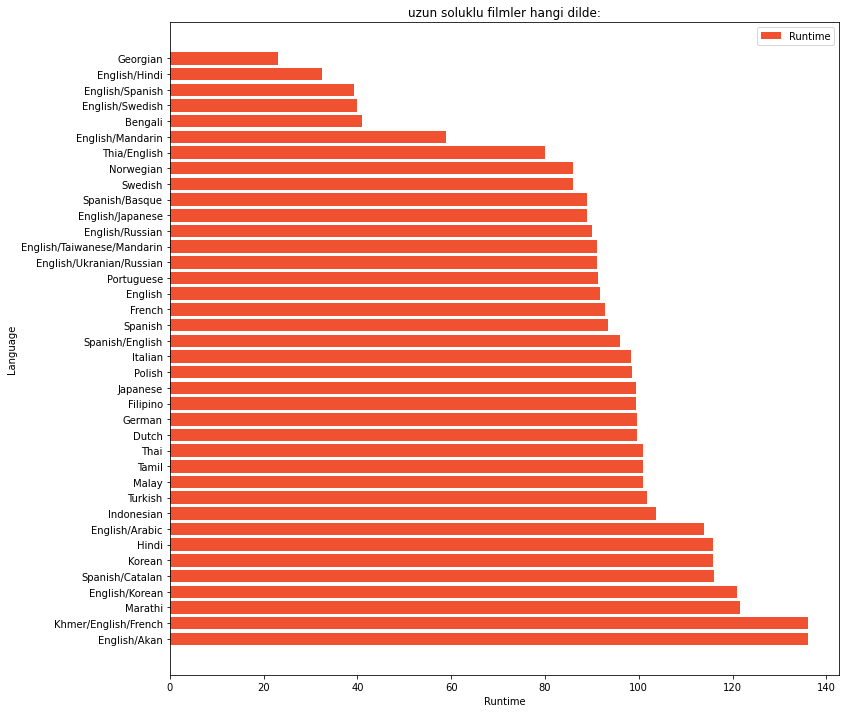

In [12]:

f=plt.figure(figsize=(12,12))

plt.barh(uzunsoluklu.Language,uzunsoluklu.Runtime,
        color="#f05131",label="Runtime")

plt.ylabel("Language")
plt.xlabel("Runtime")
plt.legend()
plt.title("uzun soluklu filmler hangi dilde:")
plt.show()

2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [13]:
import datetime as dt

In [14]:
# premiere tarih değişkenidir türünü düzeltiyorum:
for col in df.columns:
    if "Premiere" in col:
        df[col] = df[col].apply(pd.to_datetime)

In [15]:
documentary_19_20 = df.loc[(df["Premiere"] > "2019-01-31") & (df["Premiere"] < "2020-06-01") & (df["Genre"] == "Documentary")].sort_values(by="Premiere", ascending=False)

In [16]:
print(documentary_19_20)

                                                 Title        Genre   Premiere  Runtime  IMDB_Score          Language
401       Have a Good Trip: Adventures in Psychedelics  Documentary 2020-05-11       85         6.8           English
396                                           Becoming  Documentary 2020-05-06       89         6.8           English
563                                      A Secret Love  Documentary 2020-04-29       82         7.9           English
303           Murder to Mercy: The Cyntoia Brown Story  Documentary 2020-04-29       97         6.4           English
455                                    Circus of Books  Documentary 2020-04-22       92         7.1           English
484                                       LA Originals  Documentary 2020-04-10       92         7.2           English
555                 Crip Camp: A Disability Revolution  Documentary 2020-03-25      108         7.7           English
392      A Life of Speed: The Juan Manuel Fangio Story  

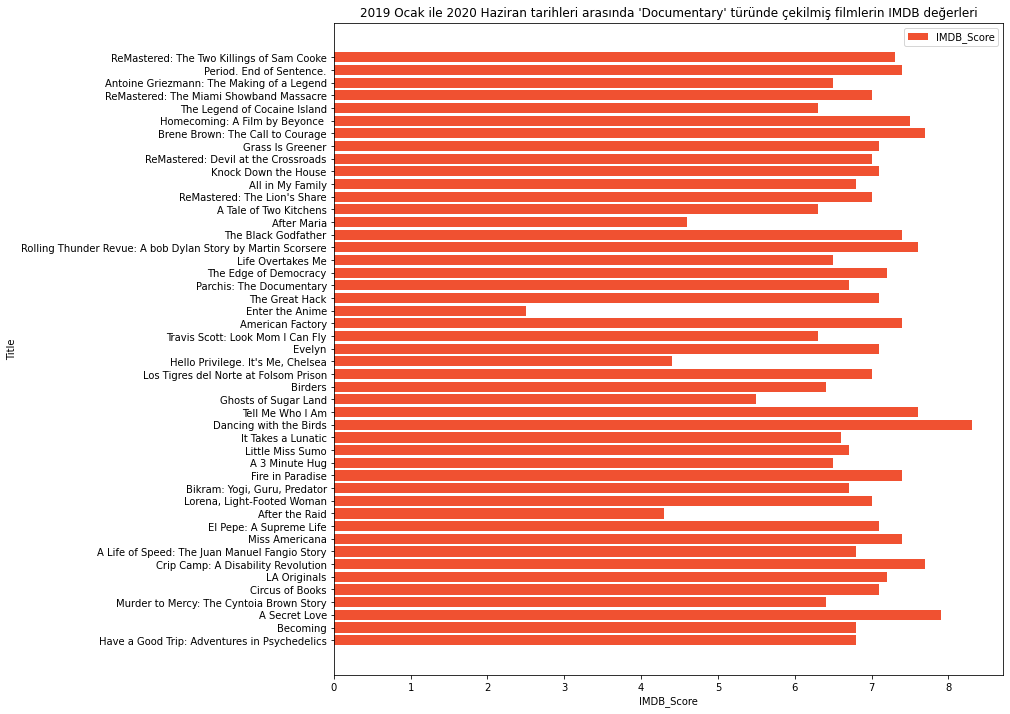

In [17]:
f=plt.figure(figsize=(12,12))

plt.barh(documentary_19_20.Title,documentary_19_20.IMDB_Score,
        color="#f05131",label="IMDB_Score")

plt.ylabel("Title")
plt.xlabel("IMDB_Score")
plt.legend()
plt.title("2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri")
plt.show()

İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [18]:
def english_imdb(dataframe):
    dataframe = dataframe.loc[(dataframe["Language"] == "English")].sort_values(by="IMDB_Score", ascending=False)
    return(dataframe["Genre"][0:1])
english_imdb(df)

583    Documentary
Name: Genre, dtype: object

'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [19]:
df.loc[(df["Language"] == "Hindi")].agg({"Runtime": "mean"})

Runtime    115.787879
dtype: float64

'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [20]:
# kaç kategori:
df["Genre"].nunique() 

115

In [21]:
# bu kategoriler:
print(df["Genre"].value_counts())

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
Comedy-drama                             14
Crime drama                              11
Biopic                                    9
Horror                                    9
Action                                    7
Romance                                   6
Concert Film                              6
Aftershow / Interview                     6
Animation                                 5
Action comedy                             5
Romantic drama                            5
Psychological thriller                    4
Science fiction/Thriller                  4
Variety show                              4
Science fiction                           4
Animation / Short                         4
Action-thriller                           3
Sports-drama                    

Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [22]:
df["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [23]:
df.sort_values(by="IMDB_Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB_Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [24]:
def correlation_matrix(df, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(df[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

In [25]:
# kategorik, numerik, numerik görünümlü kategorik ve kategorik ama kardinal değişkenleri düzenleme
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and dataframe[col].dtypes != "datetime64[ns]"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols, num_cols, cat_but_car



In [26]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=10, car_th=20)

In [27]:
num_cols

['Runtime', 'IMDB_Score']

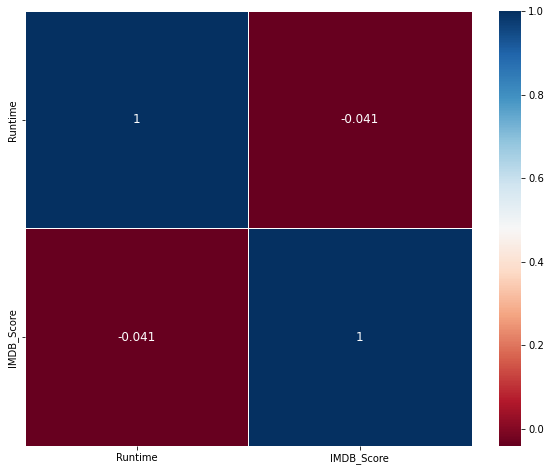

In [28]:
# num_colsta bulunan IMDB puanı ile 'Runtime' arasındaki korelasyon matrisi:
correlation_matrix(df,num_cols)

# Çok güçlü korelasyonlar (0.8 ile 1 veya -0.8 ile -1.0 arası değerler)
# Güçlü korelasyonlar (0.6 ile 0.8 veya -0.6 ile -0.8 arası değerler)
# Orta derece korelasyonlar (0.4 ile 0.6 veya -0.4 ile -0.6 arası değerler)

IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [29]:
# formül
def top10genre_imdb(dataframe):
    dataframe= dataframe.groupby("Genre").agg({"IMDB_Score": "max"}).sort_values(by="IMDB_Score", ascending=False)
    return(dataframe.head(10))

# görselleştirmede kullanabilmek için:
topgenre = top10genre_imdb(df)
topgenre.reset_index(inplace=True)

# ilk 10 genreyi görelim:
print(topgenre)

                                  Genre  IMDB_Score
0                           Documentary         9.0
1                          One-man show         8.5
2                          Concert Film         8.4
3  Animation/Christmas/Comedy/Adventure         8.2
4                                 Drama         7.9
5                     Animation / Short         7.8
6                           Crime drama         7.8
7                       Musical / Short         7.7
8                             Making-of         7.7
9                             War drama         7.7


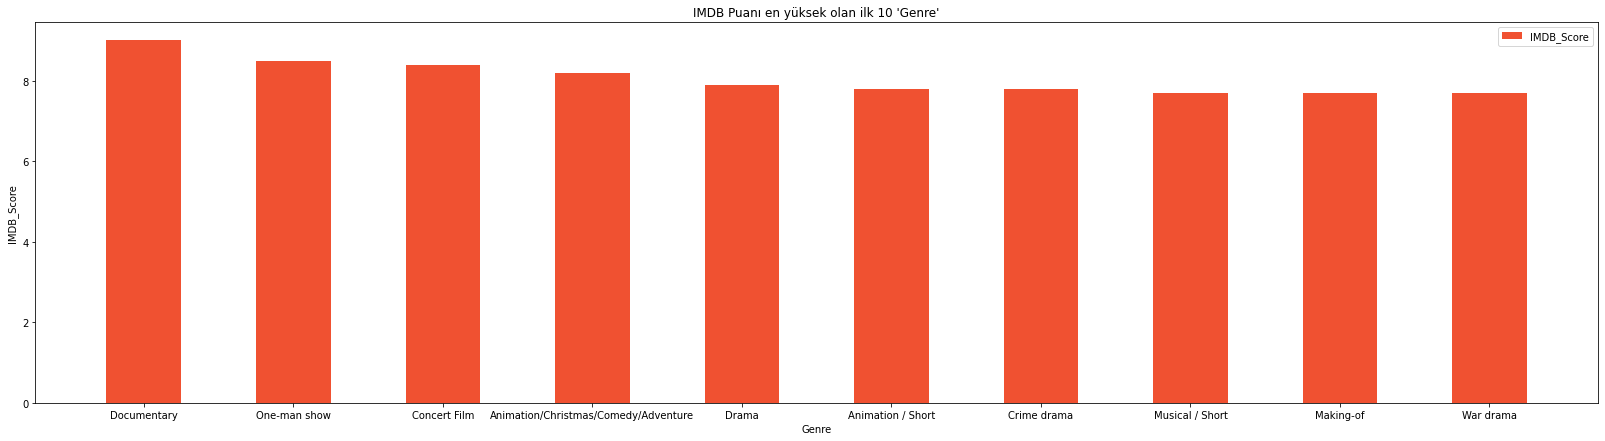

In [30]:
f=plt.figure(figsize=(28,7))

plt.bar(topgenre.Genre,topgenre.IMDB_Score,width=0.5,
        color="#f05131",label="IMDB_Score")

plt.ylabel("IMDB_Score")
plt.xlabel("Genre")
plt.legend()
plt.title("IMDB Puanı en yüksek olan ilk 10 'Genre'")
plt.show()

'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [31]:
# formül:
def runtime_title(dataframe):
    dataframe= dataframe.groupby("Title").agg({"Runtime": "max"}).sort_values(by="Runtime", ascending=False)
    runtime = dataframe.head(10)
    return(runtime)

# görselleştirmede kullanabilmek için:
runtimett = runtime_title(df)
runtimett.reset_index(inplace=True)

# ilk 10 filmi görelim:
print(runtimett)

                             Title  Runtime
0                     The Irishman      209
1                      Da 5 Bloods      155
2          Springsteen on Broadway      153
3               The Forest of Love      151
4                         Citation      151
5                   Raat Akeli Hai      149
6  The Last Days of American Crime      149
7                             Ludo      149
8                 Army of the Dead      148
9                            Drive      147


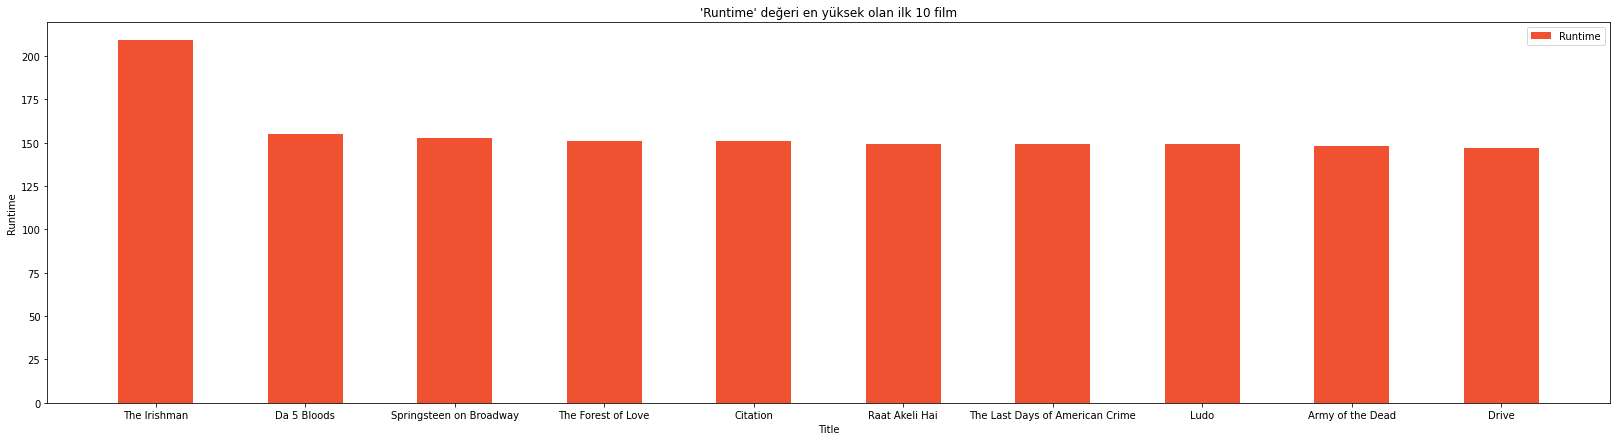

In [32]:
f=plt.figure(figsize=(28,7))

plt.bar(runtimett.Title,runtimett.Runtime,width=0.5,
        color="#f05131",label="Runtime")

plt.ylabel("Runtime")
plt.xlabel("Title")
plt.legend()
plt.title("'Runtime' değeri en yüksek olan ilk 10 film")
plt.show()

Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [33]:
df['Year'] = df['Premiere'].dt.year
year = df['Year'].value_counts(sort=True)
year = year.to_frame().reset_index()
year.columns = ['Year', 'Count']

In [34]:
print(year)

   Year  Count
0  2020    183
1  2019    125
2  2018     99
3  2021     71
4  2017     66
5  2016     30
6  2015      9
7  2014      1


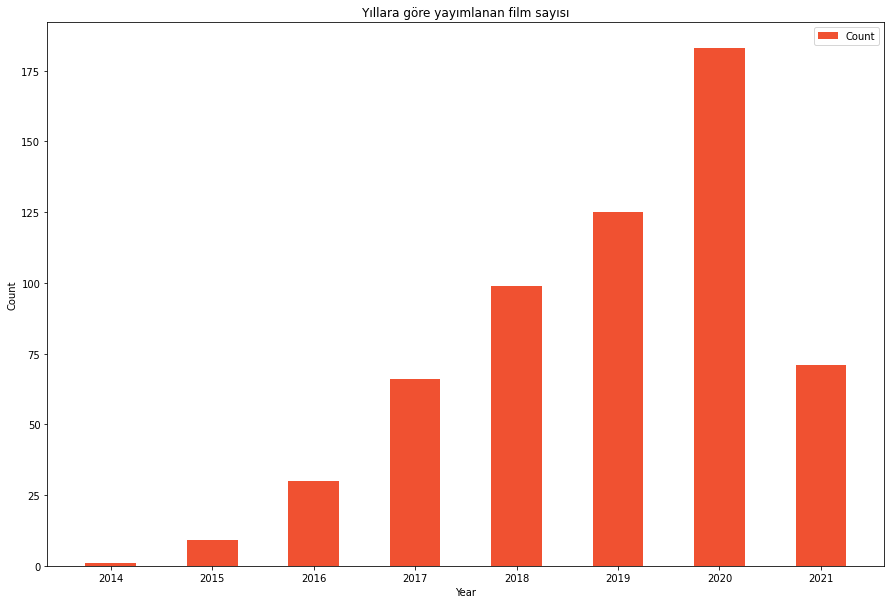

In [35]:
f=plt.figure(figsize=(15,10))

plt.bar(year.Year,year.Count,width=0.5,
        color="#f05131",label="Count")

plt.ylabel("Count")
plt.xlabel("Year")
plt.legend()
plt.title("Yıllara göre yayımlanan film sayısı")
plt.show()

Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [36]:
# formül:
def lowest_imdb(dataframe):
    dataframe= dataframe.groupby("Language").agg({"IMDB_Score": "mean"}).sort_values(by="IMDB_Score", ascending=True)
    runtime = dataframe.head(10)
    return(runtime)

# görselleştirmede kullanabilmek için:
low_imb = lowest_imdb(df)
low_imb.reset_index(inplace=True)

# en düşük imdbli dilleri görelim:
print(low_imb)

           Language  IMDB_Score
0             Malay    4.200000
1  English/Japanese    4.400000
2         Norwegian    5.100000
3          Filipino    5.100000
4            Polish    5.166667
5              Thai    5.450000
6           Swedish    5.500000
7           Italian    5.542857
8    Spanish/Basque    5.600000
9            German    5.640000


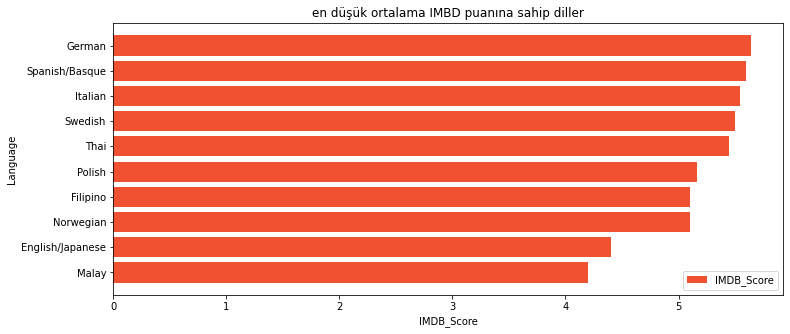

In [37]:

f=plt.figure(figsize=(12,5))

plt.barh(low_imb.Language,low_imb.IMDB_Score,
        color="#f05131",label="IMDB_Score")

plt.ylabel("Language")
plt.xlabel("IMDB_Score")
plt.legend()
plt.title("en düşük ortalama IMBD puanına sahip diller")
plt.show()

Hangi yılın toplam "runtime" süresi en fazladır?

In [38]:
df.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False).head(1)

,Runtime
Year,
2020,17384


Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [39]:
df.groupby(["Language","Genre"]).agg({"Language": "count"})

Language
Language                   Genre                                         
Bengali                    Documentary                                  1
Dutch                      Crime drama                                  1
                           Fantasy                                      1
                           Romantic comedy                              1
English                    Action                                       4
                           Action comedy                                4
                           Action thriller                              1
                           Action-thriller                              2
                           Action/Comedy                                1
                           Action/Science fiction                       1
                           Adventure                                    2
                           Adventure-romance                            1
                           Adventure/Comedy                             1
                           Aftershow / Interview                        6
                           Animated musical comedy                      1
                           Animation                                    5
                           Animation / Comedy                           1
                           Animation / Musicial                         1
                           Animation / Science Fiction                  1
                           Animation / Short                            4
                           Animation/Christmas/Comedy/Adventure         1
                           Animation/Comedy/Adventure                   1
                           Animation/Musical/Adventure                  1
                           Animation/Superhero                          1
                           Anime / Short                                1
                           Biographical/Comedy                          1
                           Biopic                                       8
                           Black comedy                                 1
                           Christian musical                            1
                           Christmas comedy                             1
                           Christmas musical                            1
                           Christmas/Fantasy/Adventure/Comedy           1
                           Comedy                                      30
                           Comedy / Musical                             2
                           Comedy horror                                1
                           Comedy mystery                               1
                           Comedy-drama                                 8
                           Comedy/Fantasy/Family                        1
                           Comedy/Horror                                1
                           Concert Film                                 6
                           Crime drama                                  5
                           Crime thriller                               1
                           Dance comedy                                 1
                           Dark comedy                                  2
                           Documentary                                120
                           Drama                                       35
                           Drama / Short                                1
                           Drama-Comedy                                 1
                           Drama/Horror                                 1
                           Family                                       1
                           Family film                                  2
                           Family/Christmas musical                     1
                           Family/Comedy-drama                       

Veri setinde outlier veri var mıdır? Açıklayınız.

In [40]:
# aykırı gözlem analizi
# aykırı değer üst ve alt limitlerini bulma
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [41]:
# aykırı gözlem varsa true
for col in num_cols:
    print(col, check_outlier(df, col))

Runtime True
IMDB_Score True


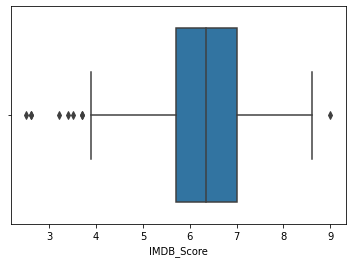

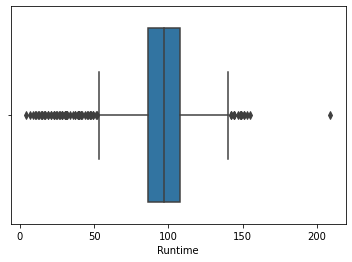

In [42]:
# Grafik Teknikle Aykırı Değerler

sns.boxplot(x=df["IMDB_Score"])
plt.show()

sns.boxplot(x=df["Runtime"])
plt.show()

In [43]:
# aykırı değerleri üst ve alt limitler ile değiştirme
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [44]:
for col in num_cols:
    print(col, replace_with_thresholds(df, col))

Runtime None
IMDB_Score None


In [45]:
# aykırı gözlemler düzeldi mi (false oldu mu)
for col in num_cols:
    print(col, check_outlier(df, col))

Runtime False
IMDB_Score False


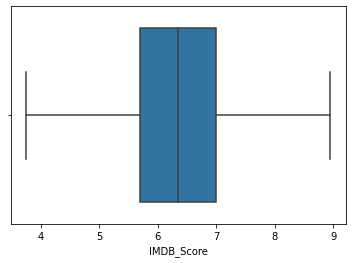

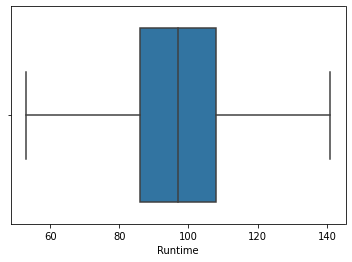

In [46]:
# Grafik Teknikle Baskıladığımız Aykırı Değerlere Tekrar bakalım

sns.boxplot(x=df["IMDB_Score"])
plt.show()

sns.boxplot(x=df["Runtime"])
plt.show()